<a href="https://colab.research.google.com/github/SisekoC/My-Notebooks/blob/main/drd2_final_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install chembl_webresource_client --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.5 MB/s eta 0:00:00


In [2]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [3]:
import numpy as np
!pip install rdkit
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 14.8 MB/s eta 0:00:00


In [4]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [6]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [7]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2024-09-24 21:37:58--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2024-09-24 21:37:59--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  51.0MB/s    in 0.5s    

2024-09-24 21:38:01 (51.0 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2024-09-24 21:38:01--  https://git

Identifying the target compound

In [8]:
# Target search for dopamine d2 receptor
target = new_client.target
target_query = target.search('DRD2')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P14416', 'xref_name': None, 'xre...",Homo sapiens,Dopamine D2 receptor,13.0,False,CHEMBL217,"[{'accession': 'P14416', 'component_descriptio...",SINGLE PROTEIN,9606
1,"[{'xref_id': 'Q9GJU1', 'xref_name': None, 'xre...",Canis lupus familiaris,Dopamine D2 receptor,13.0,False,CHEMBL2703,"[{'accession': 'Q9GJU1', 'component_descriptio...",SINGLE PROTEIN,9615
2,"[{'xref_id': 'P20288', 'xref_name': None, 'xre...",Bos taurus,Dopamine D2 receptor,13.0,False,CHEMBL3998,"[{'accession': 'P20288', 'component_descriptio...",SINGLE PROTEIN,9913
3,"[{'xref_id': 'NBK23195', 'xref_name': 'D2 dopa...",Mus musculus,Dopamine D2 receptor,13.0,False,CHEMBL3427,"[{'accession': 'P61168', 'component_descriptio...",SINGLE PROTEIN,10090
4,"[{'xref_id': 'P61169', 'xref_name': None, 'xre...",Rattus norvegicus,Dopamine D2 receptor,13.0,False,CHEMBL339,"[{'accession': 'P61169', 'component_descriptio...",SINGLE PROTEIN,10116
5,"[{'xref_id': 'P52702', 'xref_name': None, 'xre...",Chlorocebus aethiops,Dopamine D2 receptor,13.0,False,CHEMBL5456,"[{'accession': 'P52702', 'component_descriptio...",SINGLE PROTEIN,9534
6,[],Homo sapiens,Dopamine receptors; D2 & D3,11.0,False,CHEMBL2095169,"[{'accession': 'P14416', 'component_descriptio...",SELECTIVITY GROUP,9606
7,[],Homo sapiens,Dopamine receptors; D2 & D4,11.0,False,CHEMBL2095396,"[{'accession': 'P14416', 'component_descriptio...",SELECTIVITY GROUP,9606
8,[],Rattus norvegicus,Dopamine receptors; D1 & D2,11.0,False,CHEMBL2096910,"[{'accession': 'P18901', 'component_descriptio...",SELECTIVITY GROUP,10116
9,[],Bos taurus,Dopamine receptor,11.0,False,CHEMBL2096970,"[{'accession': 'Q95136', 'component_descriptio...",PROTEIN FAMILY,9913


In [9]:
selected_target = targets.target_chembl_id[0]
selected_target

'CHEMBL217'

In [10]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [11]:
df = pd.DataFrame.from_dict(res)

In [12]:
df.to_csv('drd2_bioactivity_data.csv', index=False)

In [13]:
df2 = df[df.standard_value.notna()]
df2

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,32111,[],CHEMBL671073,Binding affinity to cloned human Dopamine rece...,B,None,None,BAO_0000190,...,Homo sapiens,Dopamine D2 receptor,9606,None,None,IC50,nM,UO_0000065,None,9800.0
1,None,None,33282,[],CHEMBL671073,Binding affinity to cloned human Dopamine rece...,B,None,None,BAO_0000190,...,Homo sapiens,Dopamine D2 receptor,9606,None,None,IC50,nM,UO_0000065,None,50.0
2,None,None,38258,[],CHEMBL671073,Binding affinity to cloned human Dopamine rece...,B,None,None,BAO_0000190,...,Homo sapiens,Dopamine D2 receptor,9606,None,None,IC50,nM,UO_0000065,None,25.0
3,None,None,39387,[],CHEMBL671073,Binding affinity to cloned human Dopamine rece...,B,None,None,BAO_0000190,...,Homo sapiens,Dopamine D2 receptor,9606,None,None,IC50,nM,UO_0000065,None,360.0
4,None,None,39391,[],CHEMBL671073,Binding affinity to cloned human Dopamine rece...,B,None,None,BAO_0000190,...,Homo sapiens,Dopamine D2 receptor,9606,None,None,IC50,nM,UO_0000065,None,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2162,"{'action_type': 'PARTIAL AGONIST', 'descriptio...",None,25011746,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5236927,Partial agonist activity at human D2 receptor ...,B,None,None,BAO_0000190,...,Homo sapiens,Dopamine D2 receptor,9606,None,None,pIC50,None,UO_0000065,None,7.42
2163,"{'action_type': 'PARTIAL AGONIST', 'descriptio...",None,25011871,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5236933,Partial agonist activity at human D2 receptor ...,B,None,None,BAO_0000190,...,Homo sapiens,Dopamine D2 receptor,9606,None,None,pIC50,None,UO_0000065,None,9.0
2164,"{'action_type': 'ANTAGONIST', 'description': '...",None,25402974,[],CHEMBL5303838,Cross screening panel,B,None,None,BAO_0000190,...,Homo sapiens,Dopamine D2 receptor,9606,None,None,pIC50,None,UO_0000065,None,4.0
2165,"{'action_type': 'ANTAGONIST', 'description': '...",None,25403912,[],CHEMBL5303889,Cross screening panel,B,None,None,BAO_0000190,...,Homo sapiens,Dopamine D2 receptor,9606,None,None,pIC50,None,UO_0000065,None,5.5


In [14]:
#convert the values column to number
df2['value'] = pd.to_numeric(df2['value'], errors='coerce')

<ipython-input-14-0d04c7504a20>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['value'] = pd.to_numeric(df2['value'], errors='coerce')


In [15]:
mask = df2['units'] == 'uM'
df2.loc[mask, 'value'] = df2.loc[mask, 'value'].apply(lambda x: x*1000)
df2.loc[mask, 'units'] = 'nM'

In [16]:
bioactivity_class = []
for i in df2.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) <= 1000:
    bioactivity_class.append("active")
  else:
    bioactivity_class.append("intermediate")

In [17]:
#iterate the values to a  list
mol_cid = []
for i in df2.molecule_chembl_id:
  mol_cid.append(i)

canonical_smiles = []
for i in df2.canonical_smiles:
  canonical_smiles.append(i)

standard_value = []
for i in df2.standard_value:
  standard_value.append(i)

#combining
data_tuples = list(zip(mol_cid, canonical_smiles, bioactivity_class, standard_value))
df3 = pd.DataFrame( data_tuples,  columns=['molecule_chembl_id', 'canonical_smiles', 'bioactivity_class', 'standard_value'])

In [18]:
pd.concat([df3,pd.Series(bioactivity_class)], axis=1)

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,0
0,CHEMBL303519,c1cnc(N2CCN(Cc3cccc4c3Cc3ccccc3-4)CC2)nc1,intermediate,9800.0,intermediate
1,CHEMBL292943,COc1ccc(-c2cccc(CN3CCN(c4ncccn4)CC3)c2)cc1,active,50.0,active
2,CHEMBL61682,Fc1ccc(-c2cncc(CN3CCN(c4ccccc4F)CC3)c2)cc1,active,25.0,active
3,CHEMBL64487,COc1ccccc1-c1cccc(CN2CCN(c3ncccn3)CC2)c1,active,360.0,active
4,CHEMBL64597,c1cnc(N2CCN(Cc3cccc(-c4ccsc4)c3)CC2)nc1,active,300.0,active
...,...,...,...,...,...
1263,CHEMBL1112,O=C1CCc2ccc(OCCCCN3CCN(c4cccc(Cl)c4Cl)CC3)cc2N1,active,38.02,active
1264,CHEMBL1112,O=C1CCc2ccc(OCCCCN3CCN(c4cccc(Cl)c4Cl)CC3)cc2N1,active,1.0,active
1265,CHEMBL4635134,CNC(=O)c1cc(C(=O)NC2CC2)cn(Cc2ccccc2)c1=O,inactive,100000.0,inactive
1266,CHEMBL4639128,COCc1nc2cnc3cc(-c4c(C)noc4C)c(OC[C@H]4CCNC4)cc...,intermediate,3162.28,intermediate


In [19]:
df3.to_csv('drd2_bioactivity_preprocessed_data.csv', index=False)

In [20]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2024-09-24 21:44:58--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   220MB/s    in 0.4s    

2024-09-24 21:44:58 (220 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=p

In [21]:
df4 = pd.read_csv('drd2_bioactivity_preprocessed_data.csv')

In [22]:
df_lipinski = lipinski(df4.canonical_smiles)

In [23]:
df_combined = pd.concat([df4,df_lipinski], axis=1)


In [35]:
#ic50 to pic50
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)

    return x

In [36]:
-np.log10( (10**-9)* 100000000 )

1.0

In [37]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [38]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)

    return x

In [39]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL303519,c1cnc(N2CCN(Cc3cccc4c3Cc3ccccc3-4)CC2)nc1,intermediate,342.446,3.37000,0.0,4.0,9800.00
1,CHEMBL292943,COc1ccc(-c2cccc(CN3CCN(c4ncccn4)CC3)c2)cc1,active,360.461,3.47440,0.0,5.0,50.00
2,CHEMBL61682,Fc1ccc(-c2cncc(CN3CCN(c4ccccc4F)CC3)c2)cc1,active,365.427,4.34900,0.0,3.0,25.00
3,CHEMBL64487,COc1ccccc1-c1cccc(CN2CCN(c3ncccn3)CC2)c1,active,360.461,3.47440,0.0,5.0,360.00
4,CHEMBL64597,c1cnc(N2CCN(Cc3cccc(-c4ccsc4)c3)CC2)nc1,active,336.464,3.52730,0.0,5.0,300.00
...,...,...,...,...,...,...,...,...
1263,CHEMBL1112,O=C1CCc2ccc(OCCCCN3CCN(c4cccc(Cl)c4Cl)CC3)cc2N1,active,448.394,4.85930,1.0,4.0,38.02
1264,CHEMBL1112,O=C1CCc2ccc(OCCCCN3CCN(c4cccc(Cl)c4Cl)CC3)cc2N1,active,448.394,4.85930,1.0,4.0,1.00
1265,CHEMBL4635134,CNC(=O)c1cc(C(=O)NC2CC2)cn(Cc2ccccc2)c1=O,inactive,325.368,1.14840,2.0,4.0,100000.00
1266,CHEMBL4639128,COCc1nc2cnc3cc(-c4c(C)noc4C)c(OC[C@H]4CCNC4)cc...,intermediate,511.626,5.60034,1.0,8.0,3162.28


In [40]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL303519,c1cnc(N2CCN(Cc3cccc4c3Cc3ccccc3-4)CC2)nc1,intermediate,342.446,3.37000,0.0,4.0,5.008774
1,CHEMBL292943,COc1ccc(-c2cccc(CN3CCN(c4ncccn4)CC3)c2)cc1,active,360.461,3.47440,0.0,5.0,7.301030
2,CHEMBL61682,Fc1ccc(-c2cncc(CN3CCN(c4ccccc4F)CC3)c2)cc1,active,365.427,4.34900,0.0,3.0,7.602060
3,CHEMBL64487,COc1ccccc1-c1cccc(CN2CCN(c3ncccn3)CC2)c1,active,360.461,3.47440,0.0,5.0,6.443697
4,CHEMBL64597,c1cnc(N2CCN(Cc3cccc(-c4ccsc4)c3)CC2)nc1,active,336.464,3.52730,0.0,5.0,6.522879
...,...,...,...,...,...,...,...,...
1263,CHEMBL1112,O=C1CCc2ccc(OCCCCN3CCN(c4cccc(Cl)c4Cl)CC3)cc2N1,active,448.394,4.85930,1.0,4.0,7.419988
1264,CHEMBL1112,O=C1CCc2ccc(OCCCCN3CCN(c4cccc(Cl)c4Cl)CC3)cc2N1,active,448.394,4.85930,1.0,4.0,9.000000
1265,CHEMBL4635134,CNC(=O)c1cc(C(=O)NC2CC2)cn(Cc2ccccc2)c1=O,inactive,325.368,1.14840,2.0,4.0,4.000000
1266,CHEMBL4639128,COCc1nc2cnc3cc(-c4c(C)noc4C)c(OC[C@H]4CCNC4)cc...,intermediate,511.626,5.60034,1.0,8.0,5.500000


In [41]:
#removing intermediate class
df_2class = df_final[df_final.bioactivity_class != 'intermediate']

Plots

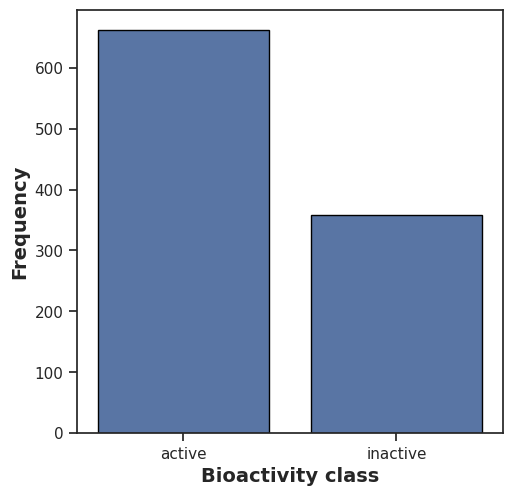

In [42]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

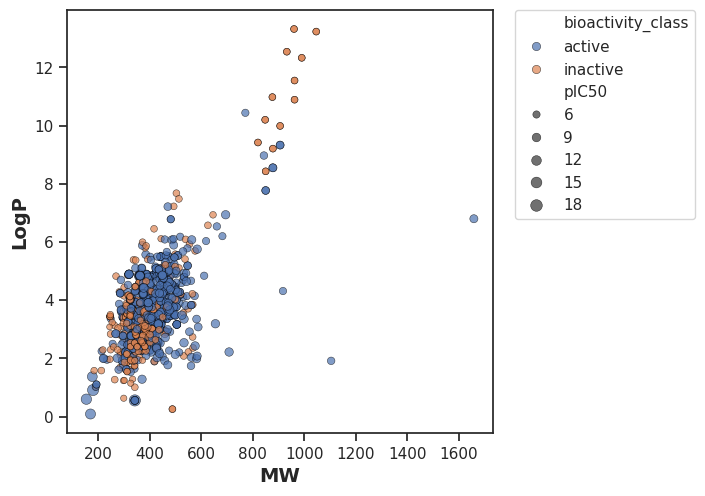

In [43]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

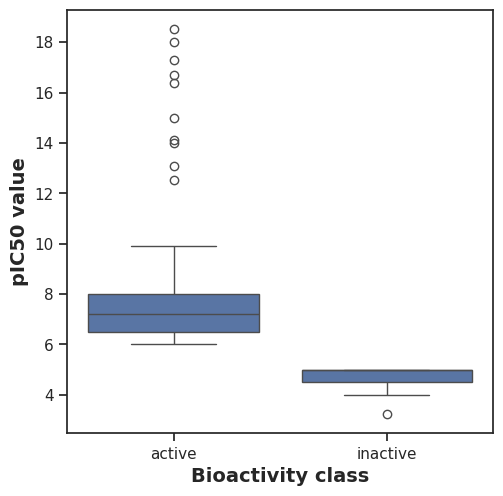

In [44]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [45]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,145763.5,1.265195e-09,0.05,Different distribution (reject H0)


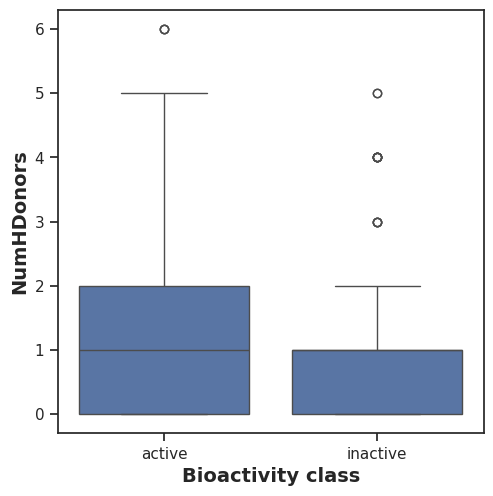

In [46]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [47]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,134765.0,0.000113,0.05,Different distribution (reject H0)


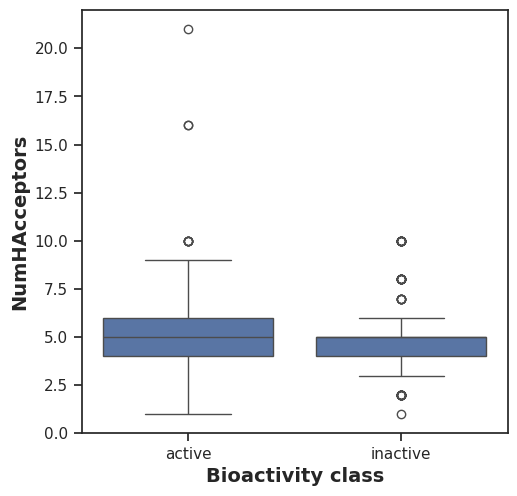

In [48]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [49]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,118556.5,0.989492,0.05,Same distribution (fail to reject H0)


Making our own model

In [50]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [51]:
selection = ['canonical_smiles','molecule_chembl_id']
df_2class_selection = df_2class[selection]
df_2class_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [52]:
! cat molecule.smi | head -5

COc1ccc(-c2cccc(CN3CCN(c4ncccn4)CC3)c2)cc1	CHEMBL292943
Fc1ccc(-c2cncc(CN3CCN(c4ccccc4F)CC3)c2)cc1	CHEMBL61682
COc1ccccc1-c1cccc(CN2CCN(c3ncccn3)CC2)c1	CHEMBL64487
c1cnc(N2CCN(Cc3cccc(-c4ccsc4)c3)CC2)nc1	CHEMBL64597
Fc1ccc(-c2cncc(CN3CCN(c4ccc(F)cc4)CC3)c2)cc1	CHEMBL291824


In [53]:
! cat molecule.smi | wc -l

1020


In [54]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [55]:
! bash padel.sh

Processing CHEMBL292943 in molecule.smi (1/1020). 
Processing CHEMBL61682 in molecule.smi (2/1020). 
Processing CHEMBL64597 in molecule.smi (4/1020). Average speed: 1.97 s/mol.
Processing CHEMBL64487 in molecule.smi (3/1020). Average speed: 3.93 s/mol.
Processing CHEMBL291824 in molecule.smi (5/1020). Average speed: 1.68 s/mol.
Processing CHEMBL59942 in molecule.smi (6/1020). Average speed: 1.36 s/mol.
Processing CHEMBL61657 in molecule.smi (7/1020). Average speed: 1.27 s/mol.
Processing CHEMBL302183 in molecule.smi (8/1020). Average speed: 1.11 s/mol.
Processing CHEMBL555670 in molecule.smi (9/1020). Average speed: 1.20 s/mol.
Processing CHEMBL40391 in molecule.smi (11/1020). Average speed: 0.87 s/mol.
Processing CHEMBL291380 in molecule.smi (10/1020). Average speed: 0.93 s/mol.
Processing CHEMBL64671 in molecule.smi (12/1020). Average speed: 0.96 s/mol.
Processing CHEMBL62829 in molecule.smi (13/1020). Average speed: 0.96 s/mol.
Processing CHEMBL302904 in molecule.smi (15/1020). Aver

In [56]:
df_2class_X = pd.read_csv('descriptors_output.csv')

In [57]:
df_2class_X = df_2class_X.drop(columns=['Name'])

In [58]:
df_2class_Y = df_2class['pIC50']

In [59]:
dataset = pd.concat([df_2class_X,df_2class_Y], axis=1)

In [60]:
dataset_cleaned = dataset.dropna()

In [61]:
dataset_cleaned.to_csv('drd2_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

In [62]:
df_model = pd.read_csv('drd2_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [63]:
X = df_model.drop('pIC50', axis=1)
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

In [64]:
Y = df_model.pIC50

In [65]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [67]:
def pls_1(X, Y, num_components):
    X = X - np.mean(X, axis=0)
    Y = Y - np.mean(Y, axis=0)

    T = np.zeros((X.shape[0], num_components))
    P = np.zeros((X.shape[1], num_components))
    W = np.zeros((X.shape[1], num_components))
    B = np.zeros(num_components)

    for i in range(num_components):
        w = np.dot(X.T, Y) / np.linalg.norm(np.dot(X.T, Y))
        t = np.dot(X, w)
        p = np.dot(X.T, t) / np.dot(t.T, t)
        b = np.dot(t.T, Y) / np.dot(t.T, t)

        T[:,i] = t.flatten()
        W[:,i] = w.flatten()
        P[:,i] = p.flatten()
        B[i] = b

        X = X - np.outer(t, p.T)
        Y = Y - b * t

    return T, W, P, B

In [68]:
T, W, P, B = pls_1(X_test, Y_test, num_components=2)

print("T (scores):", T)
print("W (weights):", W)
print("P (loadings):", P)
print("B (regressions coefficients):", B)

T (scores): [[ 2.32196536e+00 -2.38474123e+00]
 [-2.23717195e+00  5.95814894e-01]
 [-2.85359694e+00 -4.24596232e+00]
 [ 5.65395704e+00 -4.84390770e+00]
 [-7.31826146e+00  1.45507319e+00]
 [-7.43434439e+00  1.65487322e+00]
 [-5.61048824e+00  2.54675724e-01]
 [ 6.83476099e+00  1.69956395e+00]
 [-5.29374092e+00 -3.30040041e-01]
 [-1.27553065e+00  6.25253196e+00]
 [-8.44186575e+00 -2.51655104e+00]
 [ 2.99183284e+00  2.00751301e+00]
 [ 2.86500372e+00 -1.22281341e+00]
 [ 4.66241349e+00  4.86161061e+00]
 [ 4.32162156e+00 -1.50328888e+00]
 [-1.86342218e+00  4.29221212e+00]
 [ 3.85636274e+00 -8.21178520e+00]
 [ 4.44169429e+00 -1.67864753e+00]
 [-9.31207889e+00 -2.06660621e+00]
 [-6.91279776e+00  1.49469452e+00]
 [-1.35531377e+00  3.25873950e+00]
 [ 2.29641174e+00 -1.33775589e+00]
 [-7.63662387e+00  9.39812857e-01]
 [-3.29669434e+00 -1.11060319e+00]
 [-7.54208324e+00  1.11434841e+00]
 [ 3.09960796e+00  1.25275379e+00]
 [ 4.62834255e+00 -2.96794713e+00]
 [-2.30475282e+00  5.73205905e+00]
 [-6.402

In [69]:
def predict_pls_1(X_new, W, B, num_components):
    T_new = np.dot(X_new, W[:,:num_components])
    Y_pred = np.dot(T_new, B[:num_components].T)
    return Y_pred

In [70]:
Y_pred = predict_pls_1(X_test, W, B, num_components=2)

<function matplotlib.pyplot.show(close=None, block=None)>

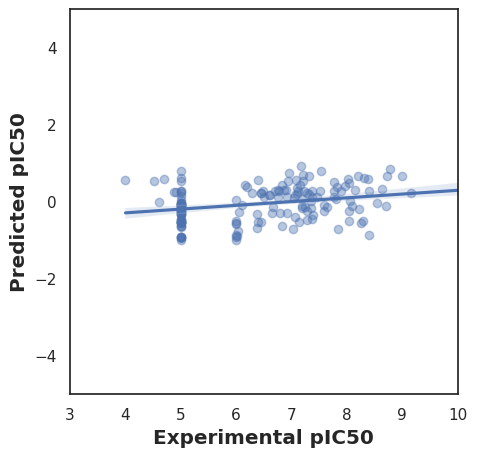

In [71]:
sns.set(color_codes=True)
sns.set_style("white")
ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(3, 10)
ax.set_ylim(-5, 5)
ax.figure.set_size_inches(5, 5)
plt.show

In [72]:
r2 = r2_score(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 45.51683636240295


In [73]:
corr_matrix = np.corrcoef(Y_test, Y_pred)
corr = corr_matrix[0,1]
R_sq = corr**2
print(f"R squared: {R_sq}")

R squared: 0.12015524029516028
